In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Networkfile.txt to Networkfile.txt


In [3]:
# Read the edge data from the txt file
edge_data_file = "Networkfile.txt"
edge_data = []

with open(edge_data_file, "r") as file:
    for line in file:
        node1, node2, weight = map(int, line.strip().split())
        edge_data.append((node1, node2, weight))

# Initialize an empty dictionary to store the degree centrality for each node
degree_centrality = {}

# Count the occurrences of each node in the edge data to calculate its degree centrality
for edge in edge_data:
    node1, node2, _ = edge
    degree_centrality[node1] = degree_centrality.get(node1, 0) + 1
    degree_centrality[node2] = degree_centrality.get(node2, 0) + 1

# Display the degree centrality for each node
for node, degree in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {degree}")


Node 24: Degree Centrality = 14
Node 27: Degree Centrality = 20
Node 83: Degree Centrality = 97
Node 271: Degree Centrality = 18
Node 321: Degree Centrality = 18
Node 576: Degree Centrality = 11
Node 746: Degree Centrality = 22
Node 819: Degree Centrality = 12
Node 853: Degree Centrality = 16
Node 866: Degree Centrality = 23
Node 1005: Degree Centrality = 51
Node 1079: Degree Centrality = 14
Node 1122: Degree Centrality = 102
Node 1148: Degree Centrality = 20
Node 1149: Degree Centrality = 15
Node 84: Degree Centrality = 12
Node 111: Degree Centrality = 24
Node 142: Degree Centrality = 13
Node 224: Degree Centrality = 16
Node 363: Degree Centrality = 13
Node 476: Degree Centrality = 15
Node 541: Degree Centrality = 12
Node 546: Degree Centrality = 47
Node 587: Degree Centrality = 78
Node 636: Degree Centrality = 26
Node 824: Degree Centrality = 36
Node 863: Degree Centrality = 27
Node 930: Degree Centrality = 23
Node 1123: Degree Centrality = 14
Node 69: Degree Centrality = 16
Node 307

In [4]:
import networkx as nx

# Read the edge data from the txt file and create a graph
edge_data_file = "Networkfile.txt"
G = nx.Graph()

with open(edge_data_file, "r") as file:
    for line in file:
        source, target, weight = map(int, line.strip().split())
        G.add_edge(source, target, weight=weight)

# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Display the Eigenvector Centrality for each node
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")


Node 24: Eigenvector Centrality = 0.0487
Node 27: Eigenvector Centrality = 0.0736
Node 83: Eigenvector Centrality = 0.2761
Node 271: Eigenvector Centrality = 0.0790
Node 321: Eigenvector Centrality = 0.0737
Node 576: Eigenvector Centrality = 0.0531
Node 746: Eigenvector Centrality = 0.0796
Node 819: Eigenvector Centrality = 0.0497
Node 853: Eigenvector Centrality = 0.0597
Node 866: Eigenvector Centrality = 0.0909
Node 1005: Eigenvector Centrality = 0.1645
Node 1079: Eigenvector Centrality = 0.0548
Node 1122: Eigenvector Centrality = 0.2847
Node 1148: Eigenvector Centrality = 0.0820
Node 1149: Eigenvector Centrality = 0.0657
Node 84: Eigenvector Centrality = 0.0529
Node 111: Eigenvector Centrality = 0.1009
Node 142: Eigenvector Centrality = 0.0558
Node 224: Eigenvector Centrality = 0.0683
Node 363: Eigenvector Centrality = 0.0614
Node 476: Eigenvector Centrality = 0.0662
Node 541: Eigenvector Centrality = 0.0464
Node 546: Eigenvector Centrality = 0.1691
Node 587: Eigenvector Centrality 

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Mapfile.txt to Mapfile.txt


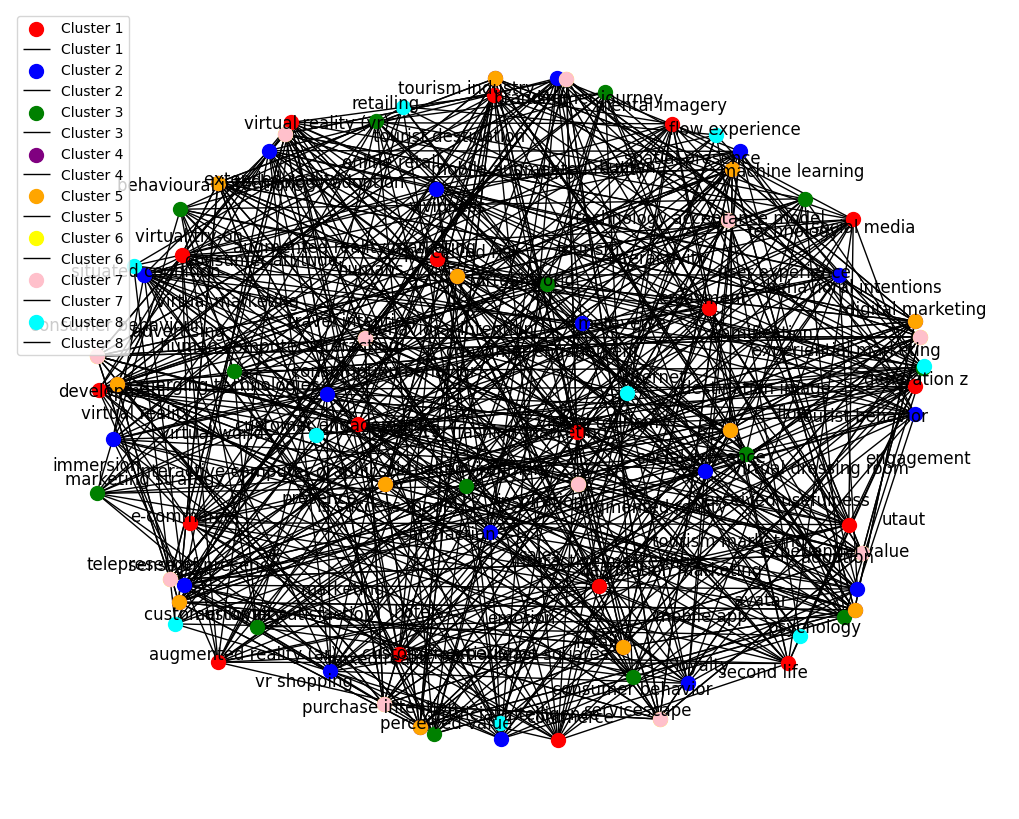

In [6]:
# Read data from the txt file
data_file = "Mapfile.txt"  # Replace with the actual file path
df = pd.read_csv(data_file, sep='\t')

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for idx, row in df.iterrows():
    G.add_node(row['id'], label=row['label'], x=row['x'], y=row['y'], cluster=row['cluster'])

# Add edges to the graph
for idx, row in df.iterrows():
    for idx2, row2 in df.iterrows():
        if idx != idx2:
            source_node = row['id']
            target_node = row2['id']
            weight_links = row['weight<Links>']
            G.add_edge(source_node, target_node, weight_links=weight_links)

# Get clusters from the graph nodes
clusters = set(nx.get_node_attributes(G, 'cluster').values())

# Create a dictionary to map cluster labels to different colors
cluster_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange', 6: 'yellow', 7: 'pink', 8: 'cyan', 9: 'brown'}

# Plot the cluster graph
plt.figure(figsize=(10, 8))
for cluster in clusters:
    nodes_cluster = [node for node, data in G.nodes(data=True) if data['cluster'] == cluster]
    subgraph = G.subgraph(nodes_cluster)
    nx.draw(subgraph, pos=nx.spring_layout(subgraph, seed=42), node_size=100, node_color=cluster_colors[cluster], label=f"Cluster {cluster}")

# Add labels to the nodes
node_labels = nx.get_node_attributes(G, 'label')
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.legend()
plt.axis('off')
plt.show()


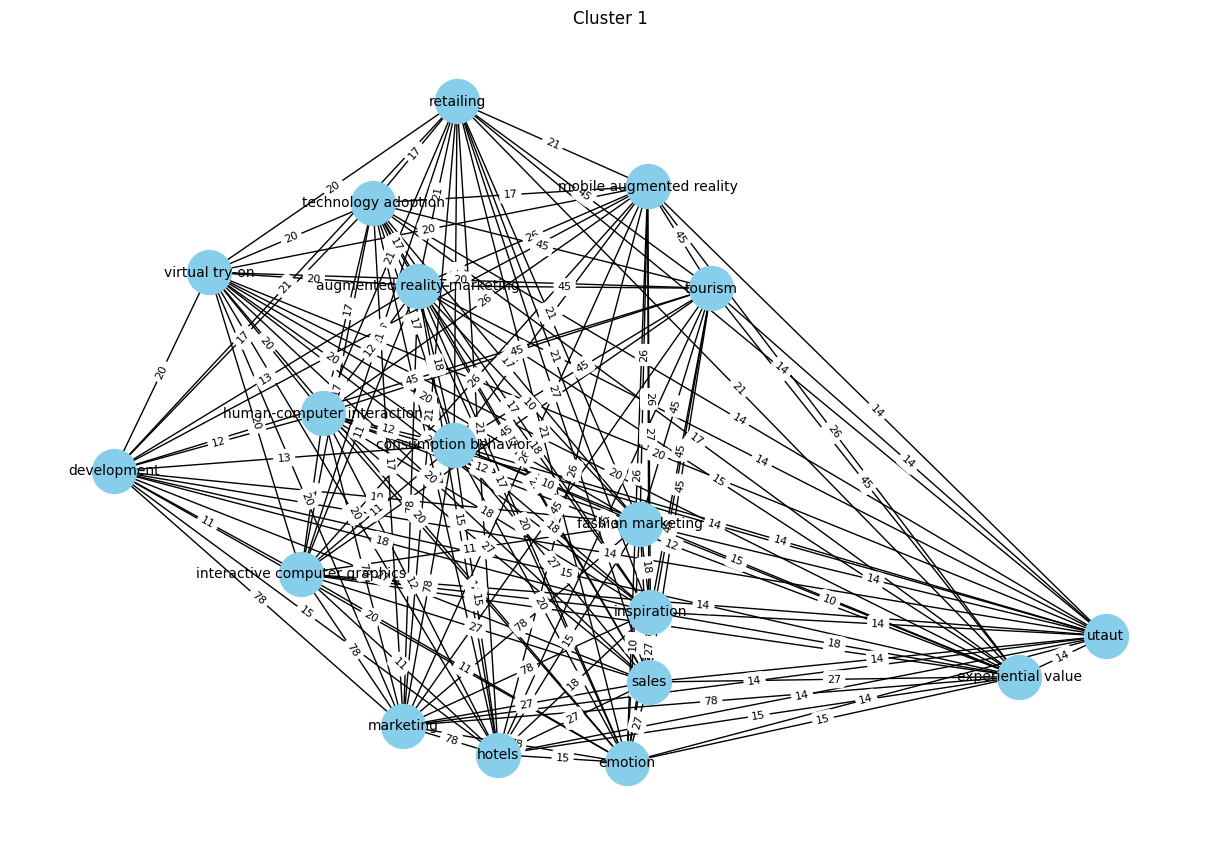

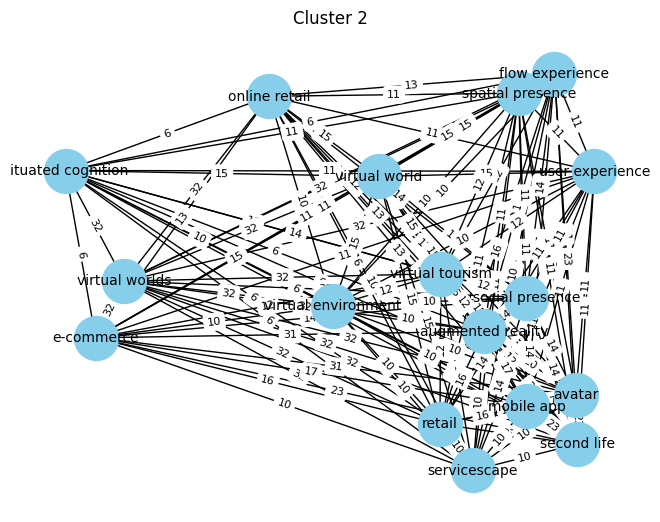

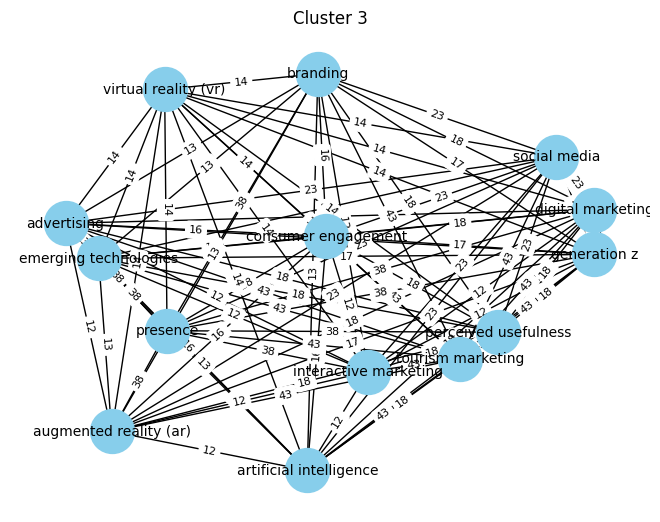

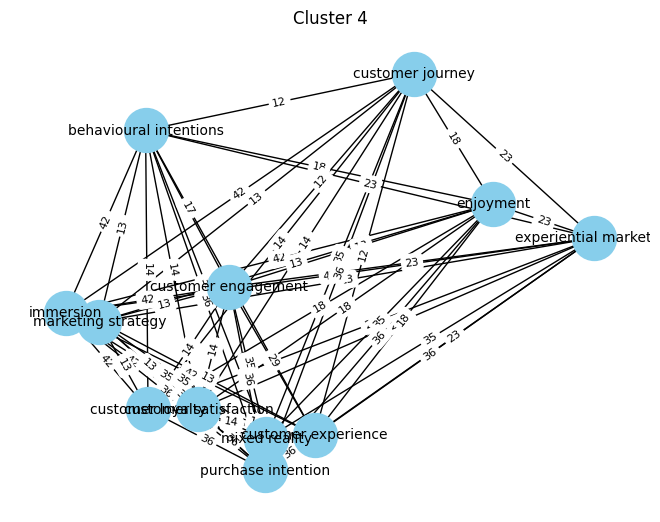

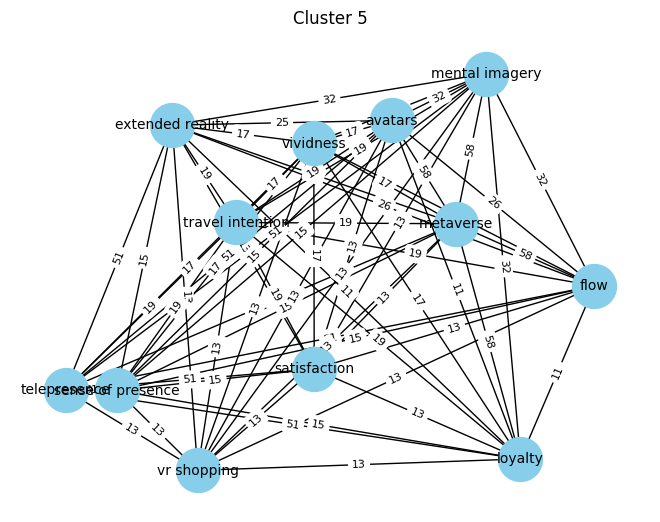

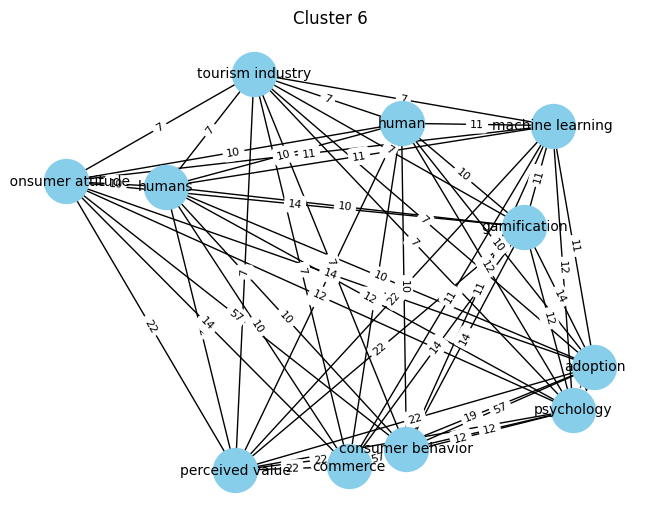

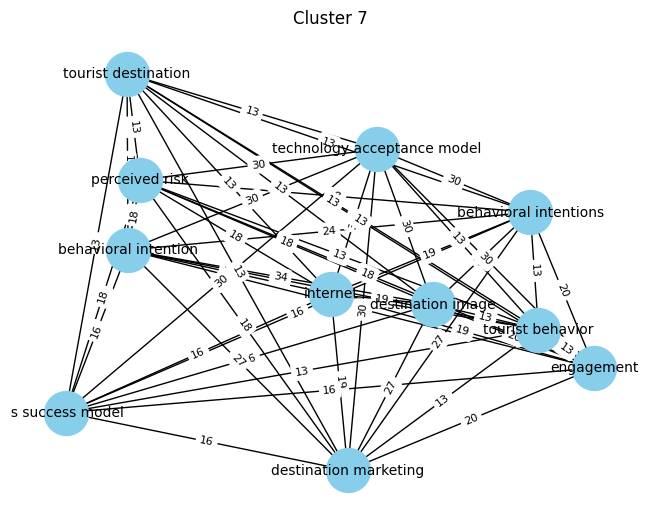

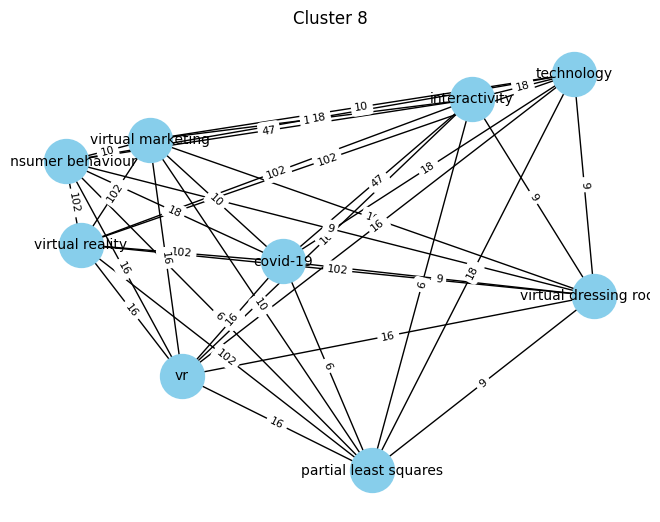

In [7]:
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for idx, row in df.iterrows():
    G.add_node(row['id'], label=row['label'], x=row['x'], y=row['y'], cluster=row['cluster'])

# Add edges to the graph
for idx, row in df.iterrows():
    for idx2, row2 in df.iterrows():
        if idx != idx2:
            source_node = row['id']
            target_node = row2['id']
            weight_links = row['weight<Links>']
            G.add_edge(source_node, target_node, weight_links=weight_links)

# Divide the graph into subgraphs based on clusters
clusters = set(nx.get_node_attributes(G, 'cluster').values())
subgraphs = {}
for cluster in clusters:
    nodes_in_cluster = [node for node, data in G.nodes(data=True) if data['cluster'] == cluster]
    subgraphs[cluster] = G.subgraph(nodes_in_cluster)

# Visualize the subgraphs
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as needed

for cluster, subgraph in subgraphs.items():
    labels = nx.get_node_attributes(subgraph, 'label')
    weights = nx.get_edge_attributes(subgraph, 'weight_links')

    nx.draw(subgraph, pos, with_labels=True, labels=labels, node_size=1000, node_color='skyblue', font_size=10)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=weights, font_size=8)

    plt.title(f"Cluster {cluster}")
    plt.show()


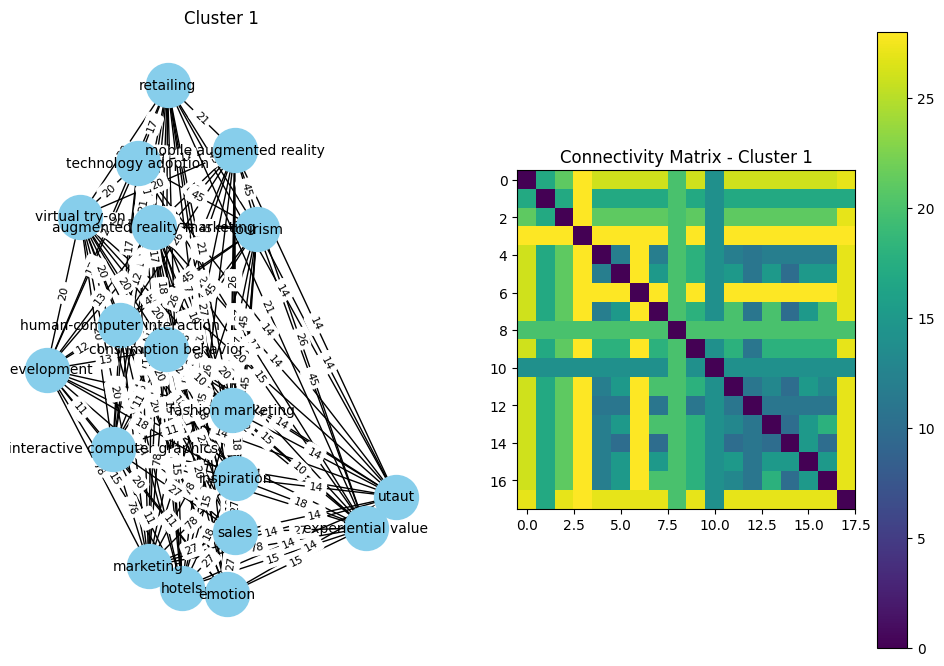

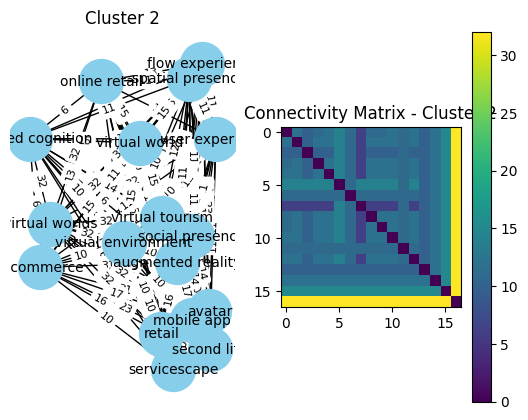

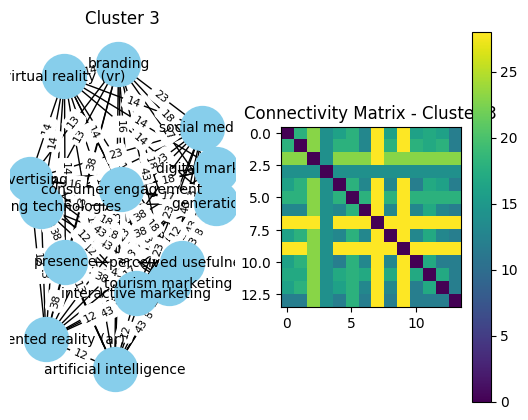

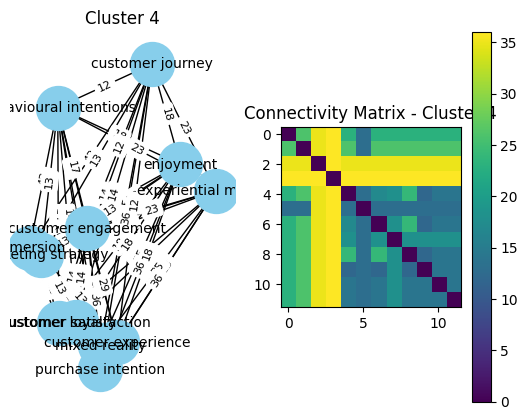

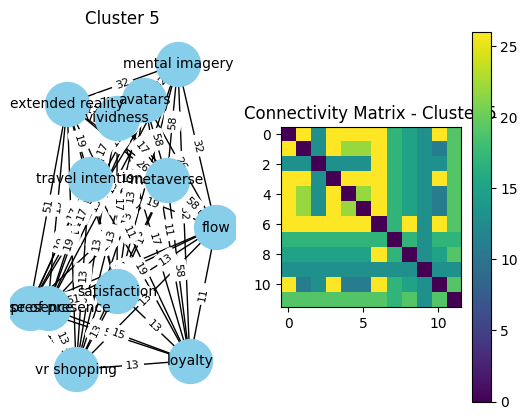

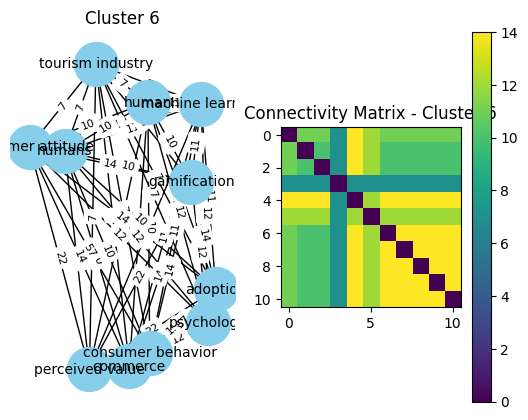

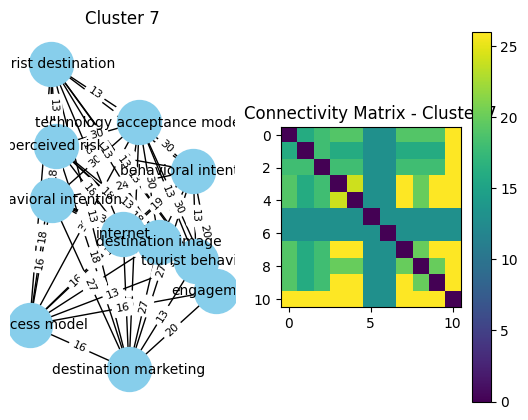

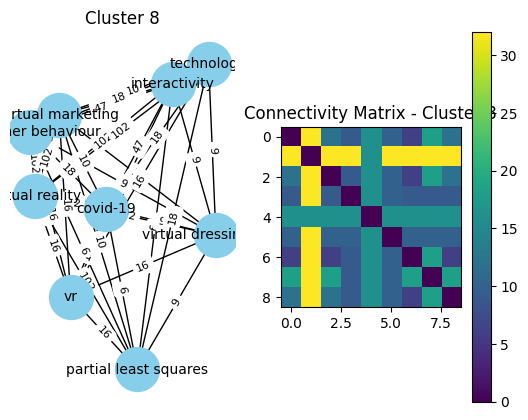

In [8]:
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for idx, row in df.iterrows():
    G.add_node(row['id'], label=row['label'], x=row['x'], y=row['y'], cluster=row['cluster'])

# Add edges to the graph
for idx, row in df.iterrows():
    for idx2, row2 in df.iterrows():
        if idx != idx2:
            source_node = row['id']
            target_node = row2['id']
            weight_links = row['weight<Links>']
            G.add_edge(source_node, target_node, weight_links=weight_links)

# Divide the graph into subgraphs based on clusters
clusters = set(nx.get_node_attributes(G, 'cluster').values())
subgraphs = {}
for cluster in clusters:
    nodes_in_cluster = [node for node, data in G.nodes(data=True) if data['cluster'] == cluster]
    subgraphs[cluster] = G.subgraph(nodes_in_cluster)

# Calculate the connectivity matrix for each cluster
connectivity_matrices = {}
for cluster, subgraph in subgraphs.items():
    connectivity_matrix = nx.floyd_warshall_numpy(subgraph, weight='weight_links')
    connectivity_matrices[cluster] = pd.DataFrame(connectivity_matrix, index=subgraph.nodes, columns=subgraph.nodes)

# Visualize the subgraphs and the connectivity matrices
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as needed

for cluster, subgraph in subgraphs.items():
    labels = nx.get_node_attributes(subgraph, 'label')
    weights = nx.get_edge_attributes(subgraph, 'weight_links')

    plt.subplot(1, 2, 1)
    nx.draw(subgraph, pos, with_labels=True, labels=labels, node_size=1000, node_color='skyblue', font_size=10)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=weights, font_size=8)
    plt.title(f"Cluster {cluster}")

    plt.subplot(1, 2, 2)
    connectivity_matrix = connectivity_matrices[cluster]
    plt.imshow(connectivity_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f"Connectivity Matrix - Cluster {cluster}")

    plt.show()


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Networkfile.csv to Networkfile.csv


In [10]:
from google.colab import files
uploaded = files.upload()

Saving cluster_info.csv to cluster_info.csv


In [11]:
# Load your network data
network_data = pd.read_csv("Networkfile.csv")  # Replace with the actual file path

# Load your cluster info data
cluster_info = pd.read_csv("cluster_info.csv")  # Replace with the actual file path

# Display the first few rows of the dataframes
print("Network Data:")
print(network_data.head())

print("\nCluster Info:")
print(cluster_info.head())


Network Data:
   source  target
0      24      27
1      24      83
2      24     271
3      24     321
4      24     576

Cluster Info:
   id  cluster
0  24        6
1  27        3
2  69        3
3  83        2
4  84        3


In [12]:
# Initialize a dictionary to store tie counts from each source cluster to target clusters
cluster_ties = {}

# Iterate through the rows of the network data
for index, row in network_data.iterrows():
    source_node = row['source']
    target_node = row['target']

    # Find the source cluster
    source_cluster = cluster_info.loc[cluster_info['id'] == source_node, 'cluster'].values[0]

    # Find the target cluster
    target_cluster = cluster_info.loc[cluster_info['id'] == target_node, 'cluster'].values[0]

    # Update the cluster_ties dictionary
    if source_cluster not in cluster_ties:
        cluster_ties[source_cluster] = {}

    if target_cluster not in cluster_ties[source_cluster]:
        cluster_ties[source_cluster][target_cluster] = 0

    cluster_ties[source_cluster][target_cluster] += 1

# Now cluster_ties contains the counts of ties from each source cluster to target clusters
# You can access the counts as cluster_ties[source_cluster][target_cluster]


In [13]:
for source_cluster, target_counts in cluster_ties.items():
    for target_cluster, count in target_counts.items():
        print(f"Ties from Cluster {source_cluster} to Cluster {target_cluster}: {count}")


Ties from Cluster 6 to Cluster 3: 7
Ties from Cluster 6 to Cluster 2: 19
Ties from Cluster 6 to Cluster 8: 20
Ties from Cluster 6 to Cluster 6: 26
Ties from Cluster 6 to Cluster 5: 18
Ties from Cluster 6 to Cluster 1: 21
Ties from Cluster 6 to Cluster 4: 19
Ties from Cluster 6 to Cluster 7: 6
Ties from Cluster 3 to Cluster 2: 10
Ties from Cluster 3 to Cluster 3: 38
Ties from Cluster 3 to Cluster 7: 10
Ties from Cluster 3 to Cluster 1: 24
Ties from Cluster 3 to Cluster 8: 25
Ties from Cluster 3 to Cluster 6: 2
Ties from Cluster 3 to Cluster 4: 15
Ties from Cluster 3 to Cluster 5: 17
Ties from Cluster 2 to Cluster 3: 15
Ties from Cluster 2 to Cluster 1: 28
Ties from Cluster 2 to Cluster 2: 57
Ties from Cluster 2 to Cluster 5: 26
Ties from Cluster 2 to Cluster 7: 15
Ties from Cluster 2 to Cluster 4: 15
Ties from Cluster 2 to Cluster 6: 7
Ties from Cluster 2 to Cluster 8: 27
Ties from Cluster 1 to Cluster 6: 6
Ties from Cluster 1 to Cluster 8: 28
Ties from Cluster 1 to Cluster 1: 68
Ties f

In [14]:
# Calculate the total ties originating from each cluster
total_ties_by_source = [sum(target_counts.values()) for target_counts in cluster_ties.values()]

# Iterate through the cluster ties and calculate the percentages
for source_cluster, target_counts in cluster_ties.items():
    print(f"Cluster {source_cluster} ", end='')
    for target_cluster, count in target_counts.items():
        percentage = (count / total_ties_by_source[source_cluster - 1]) * 100
        print(f"{percentage:.2f}% ", end='')
    print()  # Move to the next line for the next source cluster


Cluster 6 5.65% 15.32% 16.13% 20.97% 14.52% 16.94% 15.32% 4.84% 
Cluster 3 5.26% 20.00% 5.26% 12.63% 13.16% 1.05% 7.89% 8.95% 
Cluster 2 10.64% 19.86% 40.43% 18.44% 10.64% 10.64% 4.96% 19.15% 
Cluster 1 4.41% 20.59% 50.00% 6.62% 17.65% 13.24% 8.09% 11.76% 
Cluster 5 13.82% 13.82% 7.32% 34.15% 4.07% 15.45% 9.76% 1.63% 
Cluster 7 1.96% 3.92% 21.57% 11.76% 10.46% 10.46% 8.50% 12.42% 
Cluster 4 23.33% 7.78% 13.33% 12.22% 1.67% 11.67% 8.89% 6.11% 
Cluster 8 15.96% 26.60% 10.64% 10.64% 8.51% 18.09% 5.32% 4.26% 


In [15]:
# Read data from the "Mapfile.txt" file
with open('Mapfile.txt', 'r') as file:
    lines = file.readlines()

# Remove the header row
header = lines[0]
lines = lines[1:]

# Parse the data into a list of lists
data = [line.strip().split('\t') for line in lines]

# Initialize dictionaries to store keyword counts and link counts for each cluster
keyword_counts = {}
link_counts = {}

# Calculate keyword and link counts for each cluster
for row in data:
    cluster = int(row[4])
    keyword = row[1]
    link = int(row[5])

    # Update keyword counts for the cluster
    if cluster not in keyword_counts:
        keyword_counts[cluster] = set()
    keyword_counts[cluster].add(keyword)

    # Update link counts for the cluster
    if cluster not in link_counts:
        link_counts[cluster] = 0
    link_counts[cluster] += link

# Calculate %K and %DE for each cluster
for cluster, keywords in keyword_counts.items():
    total_keywords = len(keywords)
    total_links = link_counts[cluster]
    total_unique_keywords = len(set([row[1] for row in data]))

    percent_k = (total_keywords / total_unique_keywords) * 100
    percent_de = (total_links / sum(link_counts.values())) * 100

    print(f'Cluster {cluster}:')
    print(f'%K: {percent_k:.2f}%')
    print(f'%DE: {percent_de:.2f}%')
    print()


Cluster 6:
%K: 10.58%
%DE: 8.33%

Cluster 3:
%K: 13.46%
%DE: 11.96%

Cluster 2:
%K: 16.35%
%DE: 15.29%

Cluster 1:
%K: 17.31%
%DE: 17.44%

Cluster 5:
%K: 11.54%
%DE: 13.10%

Cluster 7:
%K: 10.58%
%DE: 10.17%

Cluster 4:
%K: 11.54%
%DE: 11.74%

Cluster 8:
%K: 8.65%
%DE: 11.96%

